# Project: Trends in US gun purchasing (1999 - 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report investigates the influence of demographic variables on gun purchasing behavior in the USA. Gun purchasing is not measured directly. Instead, it is inferred from the database of the FBI National Instant Criminal Background Check System (NICS) [^1]. Each record in NICS data represents the number of firearm transactions (per month and state) submitted to the NICS for a background check. Only a fraction of the total number of transactions in NICS data are purchases, the rest is related to permit checks, pawning, renting out, etc. Furthermore, a certain amount of firearms are being purchased without submitting information for a background check [^2]. Therefore, the numbers presented in this report should be viewed as an approximation of the real amount of firearm purchases.
>
> Demographic variables are supplied from US census data from 2010-2016 [^3]. 
>
> The following research questions are investigated:
>
> Q1: What census data is most associated with high gun per capita?
>
> Q2: Which states have had the highest growth in gun purchasing on a monthly basis from 1999 to 2016?
>
> Q3: What is the overall trend of gun purchases?

> [^1]: [NICS data](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fd17h27t6h515a5.cloudfront.net%2Ftopher%2F2017%2FNovember%2F5a0a4db8_gun-data%2Fgun-data.xlsx&wdOrigin=BROWSELINK)
>
> [^2]: [NICS data info](https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year.pdf),
[Brady](https://www.bradyunited.org/fact-sheets/trends-in-gun-sales)
>
> [^3]: [US census data] (https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
# Load data:
df_gun = pd.read_csv(r'C:\Users\Cvetana\Documents\Udacity projects\Data Analyst project 2\NICS and US census data\gun_data.csv', sep = ';')
df_census = pd.read_csv(r'C:\Users\Cvetana\Documents\Udacity projects\Data Analyst project 2\NICS and US census data\U.S. Census Data.csv')

#### General properties of gun data:

In [3]:
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
df_gun.shape

(12485, 27)

In [5]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [6]:
# Show duplicate rows in gun data:
df_gun.duplicated().sum()

0

>There are no duplicate rows in gun data.
>
>First remove variables, then decide how to treat nulls.

In [7]:
# Null values in gun data:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

> Check the time period for which gun data are available:

In [8]:
# Show beginning and end of 'month' column:
df_gun.month.nunique

<bound method IndexOpsMixin.nunique of 0        2017-09
1        2017-09
2        2017-09
3        2017-09
4        2017-09
          ...   
12480    1998-11
12481    1998-11
12482    1998-11
12483    1998-11
12484    1998-11
Name: month, Length: 12485, dtype: object>

> 2017 and 1998 should be trimmed from gun data (not all months are available).
>
> The nulls in gun data are further discussed below.
>
>
#### General properties of census data:

In [9]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [10]:
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


> Census table is organized differently (not according to tidy data principles):
> - the actual variables are represented as rows;
> - column names are the states; they should be row index instead;
> - table should be transposed, then data types can be fixed.
>
>Check for duplicate rows:

In [11]:
df_census.duplicated().sum()

3

>Duplicate rows are possibly the empty ones at the end of the table.
>
> First trim rows, then check again for nulls.
>
#### Prepare to merge tables for Q1:
>
> For Q1, number of states in both gun and census data should be the same. Therefore we will check the 'state' variables in both tables.
>
> States in gun data:

In [12]:
# Check how many states are listed in gun data:
df_gun.state.nunique()

55

In [13]:
# Use query() and tolist() to present a list of states: 
df_gun_states = df_gun.query('month == "2017-09"')
gun_state_list = df_gun_states.state.tolist()
print(gun_state_list)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


> States in census data:

In [14]:
# Display all states (represented as column names in original census table):
census_state_list = df_census.columns.tolist()
print(census_state_list)

['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [15]:
# Count the number of states in census table:
df_census.shape

(85, 52)

> Subtracting 'Fact' and 'Fact Note' columns from column number (52) equates to 50 states.
> Check difference between lists of states in both tables (there are more states in df_gun):

In [16]:
# List difference produces a list of extra states in gun data:
list(set(gun_state_list) - set(census_state_list))

['District of Columbia',
 'Guam',
 'Virgin Islands',
 'Puerto Rico',
 'Mariana Islands']

> The actual variables in census data (+ time of data collection) are represented as values in the 'Fact' column. The column is very long, therefore we present it in list form:

In [17]:
# Show column as list:
df_census['Fact'].tolist()

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Tw

## Data Cleaning

#### Conclusions from initial check of tables:
> - Five territories should be excluded from gun data;
> - Exclude most variables of gun data and leave only those that represent purchasing, sum them up to total gun sales;
> - Drop some rows (non-variable) from census data and then transpose;
> - Data types in gun data should all be set to float;
> - Check the null values: which ones are NaN, which ones are errant or contain special characters;
> - For Q1, gun data should be merged with census data, then gun per capita can be calculated;
> - Growth percentage on monthly basis can be calculated with special method, then group means of either states x year, or all states x year, or all states for the whole period 1999 to 2016 can be calculated.
>
#### Which variables are contained in 'total gun sales'?
>
> Based on the sources listed above, we decided to drop 'private sales' columns from gun data and to leave only handgun, long gun, other and multiple: 

In [18]:
# Delete all transactions except purchasing in gun data:
var_list = ['month', 'state', 'handgun', 'long_gun', 'other', 'multiple']
df_gun = df_gun.drop(df_gun.columns.difference(var_list), axis=1)
df_gun.head()

,month,state,handgun,long_gun,other,multiple
0,2017-09,Alabama,5734.0,6320.0,221.0,317
1,2017-09,Alaska,2320.0,2930.0,219.0,160
2,2017-09,Arizona,11063.0,7946.0,920.0,631
3,2017-09,Arkansas,4347.0,6063.0,165.0,366
4,2017-09,California,37165.0,24581.0,2984.0,0


In [19]:
# Convert 'multiple' to float
df_gun['multiple'] = df_gun['multiple'].astype(float)
df_gun.dtypes

month        object
state        object
handgun     float64
long_gun    float64
other       float64
multiple    float64
dtype: object

In [20]:
# Check for nulls after dropping columns:
df_gun.isnull().sum()

month          0
state          0
handgun       20
long_gun      19
other       6985
multiple       0
dtype: int64

> There are a lot of nulls in 'other' category. It is probably really zeros (instead of missing data).
>
>Check if there are rows where both hand gun and long gun values are null.

In [21]:
df_gun[df_gun['handgun'].isnull() & df_gun['long_gun'].isnull()]

,month,state,handgun,long_gun,other,multiple
7914,2005-10,Virgin Islands,NaN,NaN,NaN,0.0
7969,2005-09,Virgin Islands,NaN,NaN,NaN,0.0
8024,2005-08,Virgin Islands,NaN,NaN,NaN,0.0
8079,2005-07,Virgin Islands,NaN,NaN,NaN,0.0
8134,2005-06,Virgin Islands,NaN,NaN,NaN,0.0
8189,2005-05,Virgin Islands,NaN,NaN,NaN,0.0
8299,2005-03,Virgin Islands,NaN,NaN,NaN,0.0
8354,2005-02,Virgin Islands,NaN,NaN,NaN,0.0
8409,2005-01,Virgin Islands,NaN,NaN,NaN,0.0
8491,2004-11,Mariana Islands,NaN,NaN,NaN,0.0


>They are all from Virgin Islands and Mariana Islands, therefore they are going to disappear when removing extra 5 territories from gun data.
>
>The actual number of guns purchased in a 'multiple' transaction type is not known. Therefore, multiplying 'multiple' by 2 results in the minimum number of guns purchased in a 'multiple' transaction:

In [22]:
df_gun['multiple'] = df_gun['multiple'].multiply(2)
df_gun.head()

,month,state,handgun,long_gun,other,multiple
0,2017-09,Alabama,5734.0,6320.0,221.0,634.0
1,2017-09,Alaska,2320.0,2930.0,219.0,320.0
2,2017-09,Arizona,11063.0,7946.0,920.0,1262.0
3,2017-09,Arkansas,4347.0,6063.0,165.0,732.0
4,2017-09,California,37165.0,24581.0,2984.0,0.0


> The sum of all purchase types is the variable from gun data that we are looking for:

In [23]:
# Calculate total number of firearms:
df_gun['total01'] = df_gun['handgun'] + df_gun['long_gun'] + df_gun['other'] + df_gun['multiple']
df_gun.head()

,month,state,handgun,long_gun,other,multiple,total01
0,2017-09,Alabama,5734.0,6320.0,221.0,634.0,12909.0
1,2017-09,Alaska,2320.0,2930.0,219.0,320.0,5789.0
2,2017-09,Arizona,11063.0,7946.0,920.0,1262.0,21191.0
3,2017-09,Arkansas,4347.0,6063.0,165.0,732.0,11307.0
4,2017-09,California,37165.0,24581.0,2984.0,0.0,64730.0


> The percentage of handguns relative to handguns and long guns together could be interesting ('multiple' holds no information about the type of guns):

In [24]:
# Calculate handgun to (handgung + long gun) percentage ratio:
df_gun['hg_vs_lg'] = (df_gun['handgun'] / (df_gun['long_gun'] + df_gun['handgun']))*100
df_gun.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg
0,2017-09,Alabama,5734.0,6320.0,221.0,634.0,12909.0,47.569272
1,2017-09,Alaska,2320.0,2930.0,219.0,320.0,5789.0,44.190476
2,2017-09,Arizona,11063.0,7946.0,920.0,1262.0,21191.0,58.198748
3,2017-09,Arkansas,4347.0,6063.0,165.0,732.0,11307.0,41.757925
4,2017-09,California,37165.0,24581.0,2984.0,0.0,64730.0,60.190134


> The computed column contains some nulls (possibly from division by zero):

In [25]:
# Treat as missing data:
df_gun.isnull().sum()

month          0
state          0
handgun       20
long_gun      19
other       6985
multiple       0
total01     6985
hg_vs_lg     507
dtype: int64

> Remove 5 extra territories from gun data (that are not present in census data):

In [26]:
drop_states = ['Mariana Islands', 'Guam', 'District of Columbia', 'Puerto Rico', 'Virgin Islands']
df_gun = df_gun[df_gun.state.isin(drop_states) == False]
df_gun.state.nunique()

50

>Show "trimmed" state list of gun data:

In [27]:
df_gun_states50 = df_gun.query('month == "2017-09"')
gun_state50_list = df_gun_states50.state.tolist()
print(gun_state50_list)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


> Treat the rest of the nulls as missing data:

In [28]:
df_gun.isnull().sum()

month          0
state          0
handgun        0
long_gun       0
other       6350
multiple       0
total01     6350
hg_vs_lg     237
dtype: int64

##### Clean census data:
> Make a clean list of states in census data (in order to compare to states in gun data):

In [29]:
# Census_state_list is created above in preceding section
census_state_list = [i for i in census_state_list if i not in ('Fact', 'Fact Note')]
print(census_state_list)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


> Compare states in both tables:

In [30]:
gun_state50_list == census_state_list

True

> States in both tables are the same.
>
>Get location of row containing 'FIPS Code' in order to remove unnecessary variables from census data (everything from 'FIPS Code' onward):

In [31]:
# Index of row containing variable 'FIPS Code':
df_census.index[df_census['Fact'] == 'FIPS Code'].tolist()

[64]

> Remove all rows from 'FIPS Code' onward from census data:

In [32]:
df_census.drop(df_census.index[64:], inplace = True)
df_census['Fact'].tolist()

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Tw

> Remove 'Fact Note' column:

In [33]:
df_census.drop(['Fact Note'], axis = 1, inplace = True)
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> After removing last rows (from 'FIPS Code' until the end), nulls have disappeared:

In [34]:
df_census.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


> Remove redundant parts of variable names and special charactes in several steps:

In [35]:
# First, remove spaces with .str.strip() and set to lowercase; remove "(V2016)":
df_census['Fact'] = df_census['Fact'].str.replace('\(V2016\)', '', regex = True).str.strip().str.lower()

In [36]:
# Remove commas, spaces, and special characters from variable names (values of 'Fact' column)
replace_dict = {
    ",": "",
    r"\$": "",
    " ": "_",
    "-": "_",
    "/":"_",
    "\+":"_"
}

df_census['Fact'] = df_census['Fact'].replace(replace_dict, regex=True)

In [37]:
# Remove parentheses and "($1000)" from variable names (values of 'Fact' column):
replace_dict_02 = {
    "\(1000\)": "",
    "\(": "",
    "\)": "",
}

df_census['Fact'] = df_census['Fact'].replace(replace_dict_02, regex=True)

In [38]:
# Remove double underscores:
df_census['Fact'] = df_census['Fact'].str.replace('__', '_', regex = True)
df_census['Fact'].tolist()

['population_estimates_july_1_2016',
 'population_estimates_base_april_1_2010',
 'population_percent_change__april_1_2010_estimates_base_to_july_1_2016',
 'population_census_april_1_2010',
 'persons_under_5_years_percent_july_1_2016',
 'persons_under_5_years_percent_april_1_2010',
 'persons_under_18_years_percent_july_1_2016',
 'persons_under_18_years_percent_april_1_2010',
 'persons_65_years_and_over_percent_july_1_2016',
 'persons_65_years_and_over_percent_april_1_2010',
 'female_persons_percent_july_1_2016',
 'female_persons_percent_april_1_2010',
 'white_alone_percent_july_1_2016',
 'black_or_african_american_alone_percent_july_1_2016',
 'american_indian_and_alaska_native_alone_percent_july_1_2016',
 'asian_alone_percent_july_1_2016',
 'native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016',
 'two_or_more_races_percent_july_1_2016',
 'hispanic_or_latino_percent_july_1_2016',
 'white_alone_not_hispanic_or_latino_percent_july_1_2016',
 'veterans_2011_2015',
 'foreign_b

>Finally, transpose census table:

In [39]:
# Transpose df_census
df_census_trans01 = df_census.set_index('Fact').T
df_census_trans01.head()

Fact,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_percent_change__april_1_2010_estimates_base_to_july_1_2016,population_census_april_1_2010,persons_under_5_years_percent_july_1_2016,persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent_july_1_2016,persons_65_years_and_over_percent_april_1_2010,...,total_nonemployer_establishments_2015,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


> 'Fact' (actually, the 'state' column in census data) is set to index. 
>
> Data types are to be fixed.
>
> Some values in census data contain letters instead of numbers, or special characters with numbers and therefore appear as nulls:

In [40]:
df_census_trans01['total_employment_percent_change_2014_2015'].head()

Alabama       1.90%
Alaska        0.40%
Arizona       2.40%
Arkansas      1.10%
California    3.50%
Name: total_employment_percent_change_2014_2015, dtype: object

In [41]:
df_census_trans01['total_manufacturers_shipments_2012_'].head()

Alabama       124,809,759
Alaska                  D
Arizona        51,243,473
Arkansas       62,712,925
California    512,303,164
Name: total_manufacturers_shipments_2012_, dtype: object

In [42]:
# Remove percent sign from values:
df_census_trans01 = df_census_trans01.applymap(lambda x: x.replace('%', ''))
df_census_trans01.head()                                                      

Fact,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_percent_change__april_1_2010_estimates_base_to_july_1_2016,population_census_april_1_2010,persons_under_5_years_percent_july_1_2016,persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent_july_1_2016,persons_65_years_and_over_percent_april_1_2010,...,total_nonemployer_establishments_2015,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010
Alabama,"4,863,300","4,780,131",1.70,"4,779,736",6.00,6.40,22.60,23.70,16.10,13.80,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50,"710,231",7.30,7.60,25.20,26.40,10.40,7.70,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40,"6,392,017",6.30,7.10,23.50,25.50,16.90,13.80,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50,"2,915,918",6.40,6.80,23.60,24.40,16.30,14.40,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40,"37,253,956",6.30,6.80,23.20,25.00,13.60,11.40,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


In [43]:
# Remove dollar signs from values:
df_census_trans01 = df_census_trans01.applymap(lambda x: x.replace('$', ''))

df_census_trans01['median_household_income_in_2015_dollars_2011_2015'].head()

Alabama       43,623 
Alaska        72,515 
Arizona       50,255 
Arkansas      41,371 
California    61,818 
Name: median_household_income_in_2015_dollars_2011_2015, dtype: object

In [44]:
# Remove commas:
df_census_trans02 = df_census_trans01.applymap(lambda x: x.replace(',', ''))
df_census_trans02.head()

Fact,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_percent_change__april_1_2010_estimates_base_to_july_1_2016,population_census_april_1_2010,persons_under_5_years_percent_july_1_2016,persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent_july_1_2016,persons_65_years_and_over_percent_april_1_2010,...,total_nonemployer_establishments_2015,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010
Alabama,4863300,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,...,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33
Alaska,741894,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,...,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95
Arizona,6931071,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,...,451951,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08
Arkansas,2988248,2916025,2.50,2915918,6.40,6.80,23.60,24.40,16.30,14.40,...,198380,231959,123158,75962,35982,189029,25915,192988,56,52035.48
California,39250017,37254522,5.40,37253956,6.30,6.80,23.20,25.00,13.60,11.40,...,3206958,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22


> First, change data type to numeric, then to float (below):

In [45]:
# Convert object to numeric:
df_census_trans03 = df_census_trans02.applymap(pd.to_numeric, errors = 'coerce')

In [46]:
# Convert int64 to float64:
df_census_trans04 = df_census_trans03.astype(float)
df_census_trans04.head()

Fact,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_percent_change__april_1_2010_estimates_base_to_july_1_2016,population_census_april_1_2010,persons_under_5_years_percent_july_1_2016,persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016,persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent_july_1_2016,persons_65_years_and_over_percent_april_1_2010,...,total_nonemployer_establishments_2015,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010
Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.7,16.1,13.8,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.2,26.4,10.4,7.7,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95
Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.5,25.5,16.9,13.8,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08
Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.6,24.4,16.3,14.4,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48
California,39250017.0,37254522.0,5.4,37253956.0,6.3,6.8,23.2,25.0,13.6,11.4,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22


> All variables are now of the type float:

In [47]:
df_census_trans04.dtypes

Fact
population_estimates_july_1_2016                                         float64
population_estimates_base_april_1_2010                                   float64
population_percent_change__april_1_2010_estimates_base_to_july_1_2016    float64
population_census_april_1_2010                                           float64
persons_under_5_years_percent_july_1_2016                                float64
                                                                          ...   
nonminority_owned_firms_2012                                             float64
veteran_owned_firms_2012                                                 float64
nonveteran_owned_firms_2012                                              float64
population_per_square_mile_2010                                          float64
land_area_in_square_miles_2010                                           float64
Length: 64, dtype: object

> Check if there are nulls anywhere, then which variables contain them:

In [48]:
df_census_trans04.isnull().values.any()

True

In [49]:
# Which variables contain the nulls:
df_census_trans04.isna().any()[lambda x: x]

Fact
native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016    True
total_manufacturers_shipments_2012_                                     True
total_employment_percent_change_2014_2015                               True
dtype: bool

> These nulls are probably missing data or actual zeros. The variables are not of interest.
>
>
#### Adjust time periods in gun and census data
>
>For gun per capita, we are going to use population size from 2016, therefore, we only need 2016 data from gun table:

In [50]:
# Make new gun data frame with only 2016:
df_gun_2016 = df_gun[df_gun['month'].str.contains("2016-")]
df_gun_2016.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg
495,2016-12,Alabama,13733.0,17519.0,376.0,1066.0,32694.0,43.942788
496,2016-12,Alaska,4087.0,3698.0,243.0,382.0,8410.0,52.498394
497,2016-12,Arizona,18024.0,13785.0,1180.0,1406.0,34395.0,56.663209
498,2016-12,Arkansas,9192.0,13433.0,277.0,770.0,23672.0,40.627624
499,2016-12,California,63649.0,93224.0,77929.0,0.0,234802.0,40.573585


In [51]:
# 12 months x 50 states = 600 rows:
df_gun_2016.month.nunique

<bound method IndexOpsMixin.nunique of 495     2016-12
496     2016-12
497     2016-12
498     2016-12
499     2016-12
         ...   
1150    2016-01
1151    2016-01
1152    2016-01
1153    2016-01
1154    2016-01
Name: month, Length: 600, dtype: object>

> Aggregate (sum up) data for 12 months per state:

In [52]:
# Sum up purchases per state for all of 2016:
df_gun_2016_sum = df_gun_2016.groupby('state').agg(handgun=('handgun','sum'), 
                                                    long_gun=('long_gun','sum'),
                                                    other=('other', 'sum'),
                                                    multiple=('multiple', 'sum'),
                                                    total01=('total01', 'sum'),
                                                    hg_vs_lg=('hg_vs_lg','mean'))
df_gun_2016_sum.head()

,handgun,long_gun,other,multiple,total01,hg_vs_lg
state,,,,,,
Alabama,153123.0,121963.0,6104.0,13090.0,294280.0,54.433063
Alaska,37491.0,36887.0,2889.0,4632.0,81899.0,50.607794
Arizona,166784.0,108988.0,13122.0,15816.0,304710.0,60.629869
Arkansas,80244.0,82120.0,3059.0,8800.0,174223.0,50.477495
California,560355.0,554550.0,211707.0,0.0,1326612.0,51.928697


In [53]:
# Aggregated df contains 50 rows (as many as states):
df_gun_2016_sum.shape

(50, 6)

#### Merge gun 2016 data and census data: 

In [54]:
# 'state' and 'Fact' are index columns with identical values
df_combi_2016 = df_gun_2016_sum.merge(df_census_trans04, left_index=True, right_index=True)
df_combi_2016.head()

,handgun,long_gun,other,multiple,total01,hg_vs_lg,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_percent_change__april_1_2010_estimates_base_to_july_1_2016,population_census_april_1_2010,...,total_nonemployer_establishments_2015,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010
state,,,,,,,,,,,,,,,,,,,,,
Alabama,153123.0,121963.0,6104.0,13090.0,294280.0,54.433063,4863300.0,4780131.0,1.7,4779736.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33
Alaska,37491.0,36887.0,2889.0,4632.0,81899.0,50.607794,741894.0,710249.0,4.5,710231.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95
Arizona,166784.0,108988.0,13122.0,15816.0,304710.0,60.629869,6931071.0,6392301.0,8.4,6392017.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08
Arkansas,80244.0,82120.0,3059.0,8800.0,174223.0,50.477495,2988248.0,2916025.0,2.5,2915918.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48
California,560355.0,554550.0,211707.0,0.0,1326612.0,51.928697,39250017.0,37254522.0,5.4,37253956.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22


> Compute gun per capita

In [55]:
# Gun per capita (2016):
df_combi_2016['gun_per_capita'] = df_combi_2016['total01'] / df_combi_2016['population_estimates_july_1_2016']
df_combi_2016.head()

,handgun,long_gun,other,multiple,total01,hg_vs_lg,population_estimates_july_1_2016,population_estimates_base_april_1_2010,population_percent_change__april_1_2010_estimates_base_to_july_1_2016,population_census_april_1_2010,...,all_firms_2012,men_owned_firms_2012,women_owned_firms_2012,minority_owned_firms_2012,nonminority_owned_firms_2012,veteran_owned_firms_2012,nonveteran_owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,gun_per_capita
state,,,,,,,,,,,,,,,,,,,,,
Alabama,153123.0,121963.0,6104.0,13090.0,294280.0,54.433063,4863300.0,4780131.0,1.7,4779736.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,0.060510
Alaska,37491.0,36887.0,2889.0,4632.0,81899.0,50.607794,741894.0,710249.0,4.5,710231.0,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,0.110392
Arizona,166784.0,108988.0,13122.0,15816.0,304710.0,60.629869,6931071.0,6392301.0,8.4,6392017.0,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,0.043963
Arkansas,80244.0,82120.0,3059.0,8800.0,174223.0,50.477495,2988248.0,2916025.0,2.5,2915918.0,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,0.058303
California,560355.0,554550.0,211707.0,0.0,1326612.0,51.928697,39250017.0,37254522.0,5.4,37253956.0,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,0.033799


> The merged table has 50 observations, as much as the states in census data:

In [56]:
df_combi_2016.shape

(50, 71)

>After considering the most likely variables to influence gun per capita, remove most variables.
>Trim the variables in df_combi_2016 to above list + gun_per_capita.
>There are 10 variables left: the dependent variable 'gun per capita', the percentage of handguns and 8 demographic variables.

In [57]:
# Drop columns with "undrop" list:
drop_for_q1 = ['gun_per_capita', 
                'veterans_2011_2015',
                'housing_units_july_1_2016',
                'households_2011_2015',
                'in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015',
                'median_household_income_in_2015_dollars_2011_2015',
                'per_capita_income_in_past_12_months_in_2015_dollars_2011_2015',
                'persons_in_poverty_percent',
                'population_per_square_mile_2010',
                'hg_vs_lg',]
df_combi_2016_01 = df_combi_2016.drop(df_combi_2016.columns.difference(drop_for_q1), axis=1)
df_combi_2016_01.shape

(50, 10)

In [58]:
df_combi_2016_01.head()

,hg_vs_lg,veterans_2011_2015,housing_units_july_1_2016,households_2011_2015,in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015,median_household_income_in_2015_dollars_2011_2015,per_capita_income_in_past_12_months_in_2015_dollars_2011_2015,persons_in_poverty_percent,population_per_square_mile_2010,gun_per_capita
state,,,,,,,,,,
Alabama,54.433063,363170.0,2230185.0,1848325.0,58.0,43623.0,24091.0,17.1,94.4,0.060510
Alaska,50.607794,69323.0,310658.0,250969.0,67.7,72515.0,33413.0,9.9,1.2,0.110392
Arizona,60.629869,505794.0,2961003.0,2412212.0,59.3,50255.0,25848.0,16.4,56.3,0.043963
Arkansas,50.477495,220953.0,1354762.0,1138025.0,58.5,41371.0,22798.0,17.2,56.0,0.058303
California,51.928697,1777410.0,14060525.0,12717801.0,63.1,61818.0,30318.0,14.3,239.1,0.033799


>Reset index to normal column ('state'), in order to use in graphs:

In [59]:
df_combi_2016_02 = df_combi_2016_01.reset_index(level=0)
df_combi_2016_02.head()

,state,hg_vs_lg,veterans_2011_2015,housing_units_july_1_2016,households_2011_2015,in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015,median_household_income_in_2015_dollars_2011_2015,per_capita_income_in_past_12_months_in_2015_dollars_2011_2015,persons_in_poverty_percent,population_per_square_mile_2010,gun_per_capita
0,Alabama,54.433063,363170.0,2230185.0,1848325.0,58.0,43623.0,24091.0,17.1,94.4,0.060510
1,Alaska,50.607794,69323.0,310658.0,250969.0,67.7,72515.0,33413.0,9.9,1.2,0.110392
2,Arizona,60.629869,505794.0,2961003.0,2412212.0,59.3,50255.0,25848.0,16.4,56.3,0.043963
3,Arkansas,50.477495,220953.0,1354762.0,1138025.0,58.5,41371.0,22798.0,17.2,56.0,0.058303
4,California,51.928697,1777410.0,14060525.0,12717801.0,63.1,61818.0,30318.0,14.3,239.1,0.033799


> Check for null values in remaining variables:

In [60]:
df_combi_2016_02['gun_per_capita'].isnull().sum()

0

#### Clean gun data for Q2 and Q3: 
> - We are using ONLY gun data with 50 states;
> - Growth % from month to month is calculated after converting 'month' to datetime type 
> - Growth variable is then further aggregated:
>      - Mean growth per year per state; 
>      - Mean growth of all states together per year;
>      - Mean growth per state for the whole period 1999-2016;
>      - A single mean value for the USA (48 states) for 1999-2016.
>
>
> First, clear 1998 and 2017 months:

In [61]:
df_gun_trimmed = df_gun[df_gun['month'].str.contains("1998-|2017-")==False]
df_gun_trimmed.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg
495,2016-12,Alabama,13733.0,17519.0,376.0,1066.0,32694.0,43.942788
496,2016-12,Alaska,4087.0,3698.0,243.0,382.0,8410.0,52.498394
497,2016-12,Arizona,18024.0,13785.0,1180.0,1406.0,34395.0,56.663209
498,2016-12,Arkansas,9192.0,13433.0,277.0,770.0,23672.0,40.627624
499,2016-12,California,63649.0,93224.0,77929.0,0.0,234802.0,40.573585


In [62]:
df_gun_trimmed.tail()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg
12370,1999-01,Virginia,6298.0,7556.0,NaN,254.0,NaN,45.459795
12371,1999-01,Washington,1891.0,5780.0,NaN,298.0,NaN,24.651284
12372,1999-01,West Virginia,2989.0,5118.0,NaN,306.0,NaN,36.869372
12373,1999-01,Wisconsin,2709.0,5063.0,NaN,16.0,NaN,34.855893
12374,1999-01,Wyoming,668.0,1401.0,NaN,88.0,NaN,32.286129


> We assume that nulls in 'other' column are zeros and replace with zero:

In [63]:
df_gun_trimmed01 = df_gun_trimmed.fillna({'other':0})
df_gun_trimmed01.tail()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg
12370,1999-01,Virginia,6298.0,7556.0,0.0,254.0,NaN,45.459795
12371,1999-01,Washington,1891.0,5780.0,0.0,298.0,NaN,24.651284
12372,1999-01,West Virginia,2989.0,5118.0,0.0,306.0,NaN,36.869372
12373,1999-01,Wisconsin,2709.0,5063.0,0.0,16.0,NaN,34.855893
12374,1999-01,Wyoming,668.0,1401.0,0.0,88.0,NaN,32.286129


> The states where both 'handgun' and 'long_gun' were NaN, were discarded above:

In [64]:
df_gun_trimmed01[df_gun_trimmed01['handgun'].isnull() & df_gun_trimmed01['long_gun'].isnull()]

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg


> All 'handgun' and 'long_gun' values are numbers:

In [65]:
df_gun_trimmed01[df_gun_trimmed01['handgun'].isnull()]

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg


In [66]:
df_gun_trimmed01[df_gun_trimmed01['long_gun'].isnull()]

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg


>'total' can be computed again with zeros in 'other' category (as 'total02'):

In [67]:
df_gun_trimmed01['total02'] = df_gun_trimmed01['handgun'] + df_gun_trimmed01['long_gun'] 
+ df_gun_trimmed01['other'] + df_gun_trimmed01['multiple']
df_gun_trimmed01.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02
495,2016-12,Alabama,13733.0,17519.0,376.0,1066.0,32694.0,43.942788,31252.0
496,2016-12,Alaska,4087.0,3698.0,243.0,382.0,8410.0,52.498394,7785.0
497,2016-12,Arizona,18024.0,13785.0,1180.0,1406.0,34395.0,56.663209,31809.0
498,2016-12,Arkansas,9192.0,13433.0,277.0,770.0,23672.0,40.627624,22625.0
499,2016-12,California,63649.0,93224.0,77929.0,0.0,234802.0,40.573585,156873.0


> New total02 contains only numbers:

In [68]:
df_gun_trimmed01[df_gun_trimmed01['total02'].isnull()]

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02


#### Compute growth percentage on a monthly basis
>
> First, sort 'month' in ascending order:

In [69]:
df_gun_trimmed01 = df_gun_trimmed01.sort_values(by=['state', 'month'])
df_gun_trimmed01.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02
12320,1999-01,Alabama,7516.0,10311.0,0.0,444.0,NaN,42.160767,17827.0
12265,1999-02,Alabama,9630.0,10654.0,0.0,598.0,NaN,47.475843,20284.0
12210,1999-03,Alabama,9151.0,9991.0,0.0,564.0,NaN,47.805872,19142.0
12155,1999-04,Alabama,7371.0,7218.0,0.0,468.0,NaN,50.524368,14589.0
12100,1999-05,Alabama,7005.0,6832.0,0.0,412.0,NaN,50.625136,13837.0


> New column 'date' is derived from 'month' and is of datetime type:

In [70]:
df_gun_trimmed01['date'] = pd.to_datetime(df_gun_trimmed01.month)
df_gun_trimmed01.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02,date
12320,1999-01,Alabama,7516.0,10311.0,0.0,444.0,NaN,42.160767,17827.0,1999-01-01
12265,1999-02,Alabama,9630.0,10654.0,0.0,598.0,NaN,47.475843,20284.0,1999-02-01
12210,1999-03,Alabama,9151.0,9991.0,0.0,564.0,NaN,47.805872,19142.0,1999-03-01
12155,1999-04,Alabama,7371.0,7218.0,0.0,468.0,NaN,50.524368,14589.0,1999-04-01
12100,1999-05,Alabama,7005.0,6832.0,0.0,412.0,NaN,50.625136,13837.0,1999-05-01


In [71]:
df_gun_trimmed01.dtypes

month               object
state               object
handgun            float64
long_gun           float64
other              float64
multiple           float64
total01            float64
hg_vs_lg           float64
total02            float64
date        datetime64[ns]
dtype: object

> pct.change() method requires datetime column, although 'date' is not part of the expression:

In [72]:
# Calculate percent change from month to month in total02 by state (after 'date')
# "+1" means change from month to month
df_gun_trimmed01['monthly_growth'] = df_gun_trimmed01.groupby(['state'])['total02'].pct_change() + 1
df_gun_trimmed01.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02,date,monthly_growth
12320,1999-01,Alabama,7516.0,10311.0,0.0,444.0,NaN,42.160767,17827.0,1999-01-01,NaN
12265,1999-02,Alabama,9630.0,10654.0,0.0,598.0,NaN,47.475843,20284.0,1999-02-01,1.137825
12210,1999-03,Alabama,9151.0,9991.0,0.0,564.0,NaN,47.805872,19142.0,1999-03-01,0.943699
12155,1999-04,Alabama,7371.0,7218.0,0.0,468.0,NaN,50.524368,14589.0,1999-04-01,0.762146
12100,1999-05,Alabama,7005.0,6832.0,0.0,412.0,NaN,50.625136,13837.0,1999-05-01,0.948454


> Percent change calculation starts anew for every state:

In [73]:
df_gun_trimmed01[df_gun_trimmed01['state']=='Alaska']

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02,date,monthly_growth
12321,1999-01,Alaska,830.0,1393.0,0.0,110.0,NaN,37.336932,2223.0,1999-01-01,NaN
12266,1999-02,Alaska,941.0,1410.0,0.0,124.0,NaN,40.025521,2351.0,1999-02-01,1.057580
12211,1999-03,Alaska,1205.0,1935.0,0.0,132.0,NaN,38.375796,3140.0,1999-03-01,1.335602
12156,1999-04,Alaska,1381.0,2462.0,0.0,172.0,NaN,35.935467,3843.0,1999-04-01,1.223885
12101,1999-05,Alaska,1140.0,2065.0,0.0,146.0,NaN,35.569423,3205.0,1999-05-01,0.833984
...,...,...,...,...,...,...,...,...,...,...,...
716,2016-08,Alaska,2725.0,3484.0,183.0,404.0,6796.0,43.887905,6209.0,2016-08-01,1.086629
661,2016-09,Alaska,2654.0,3126.0,180.0,362.0,6322.0,45.916955,5780.0,2016-09-01,0.930907
606,2016-10,Alaska,3906.0,3949.0,347.0,548.0,8750.0,49.726289,7855.0,2016-10-01,1.358997
551,2016-11,Alaska,3396.0,4019.0,316.0,498.0,8229.0,45.799056,7415.0,2016-11-01,0.943985


> After computing variables of interest for Q1, Q2 and Q3, aggregations for conclusions are shown in the next section.
>
>

<a id='eda'></a>
## Exploratory Data Analysis

### What census data is most associated with high gun per capita?

>For Q1, the independent variables of interest are:
>
>Veterans (2011-2015)
>Housing units (July 1st, 2016)
>Households (2011-2015)
>Total percent of population age 16 years in civilian labor force (2011-2015)
>Median household income in 2015 dollars (2011-2015)
>Per capita income in past 12 months in 2015 dollars (2011-2015)
>Persons in poverty (percent)
>Population per square mile (2010)
>
>The dependent variable is gun per capita.
>
>In addition, the percentage of handguns to handguns + long guns is also informative in terms of its relationship to gun per capita and demographic variables of the states.
>
>
> Start by sorting table by gun per capita for bar chart:

In [74]:
df_combi_2016_sort = df_combi_2016_02.sort_values(by='gun_per_capita', ascending=False)
df_combi_2016_sort.head()

,state,hg_vs_lg,veterans_2011_2015,housing_units_july_1_2016,households_2011_2015,in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015,median_household_income_in_2015_dollars_2011_2015,per_capita_income_in_past_12_months_in_2015_dollars_2011_2015,persons_in_poverty_percent,population_per_square_mile_2010,gun_per_capita
1,Alaska,50.607794,69323.0,310658.0,250969.0,67.700,72515.0,33413.0,9.900,1.2,0.110392
40,South Dakota,42.970513,63742.0,383838.0,330858.0,0.686,50957.0,26747.0,0.133,10.7,0.108087
47,West Virginia,53.872672,150021.0,886640.0,740890.0,53.900,41751.0,23450.0,17.900,77.1,0.102363
25,Montana,40.139863,90000.0,497756.0,409394.0,63.600,47169.0,26381.0,13.300,6.8,0.097724
49,Wyoming,46.627558,48505.0,270600.0,226865.0,67.700,58840.0,29803.0,11.300,5.8,0.089549


>The series below show only order of states and values of gun per capita in descending order:

In [75]:
# Extract series (only state and gun per capita)
df_gun_per_cap_sorted = df_combi_2016_sort[['state','gun_per_capita']]
df_gun_per_cap_sorted

,state,gun_per_capita
1,Alaska,0.110392
40,South Dakota,0.108087
47,West Virginia,0.102363
25,Montana,0.097724
49,Wyoming,0.089549
28,New Hampshire,0.086550
24,Missouri,0.085405
35,Oklahoma,0.084391
5,Colorado,0.084288
41,Tennessee,0.083673


> We further illustrate the above series with a bar chart:

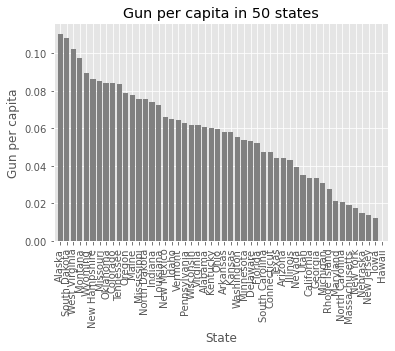

In [76]:
# Bar chart of gun per capita vs. state:
# ggplotstyle is used because of 'more than 32 args' rule in matplotlib

x = df_combi_2016_sort.state.tolist()
y = df_combi_2016_sort.gun_per_capita.tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='gray')
plt.xlabel("State")
plt.ylabel("Gun per capita")
plt.title("Gun per capita in 50 states")

plt.xticks(x_pos, x, rotation=90)

plt.xlim(-1,50)

plt.show()

#### Influence of independent variables from census 2016 data on gun per capita:
>
> The covariation and the joint distribution of gun per capita with each of the independent variables of interest are illustrated in a series of combined scatter plots + histograms: 

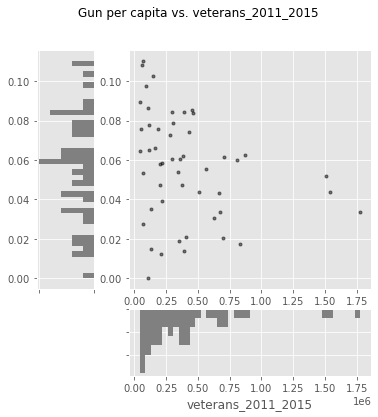

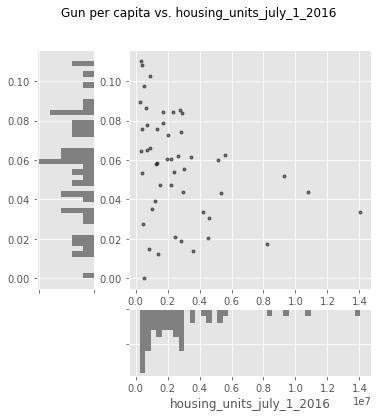

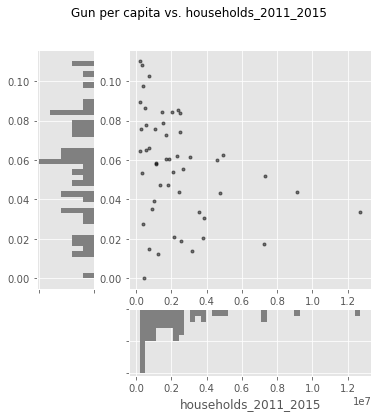

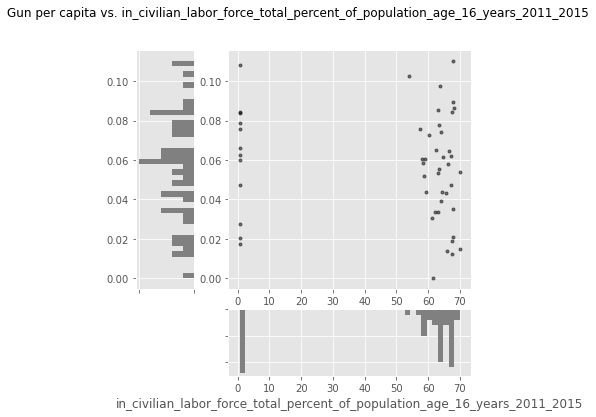

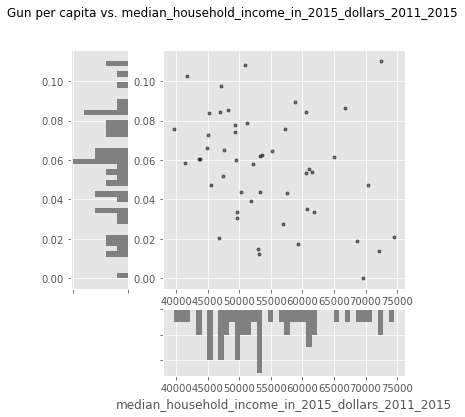

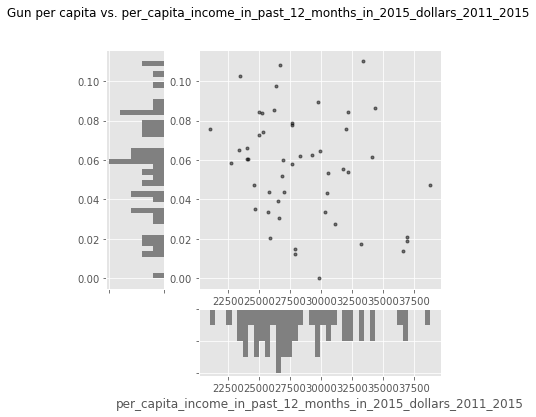

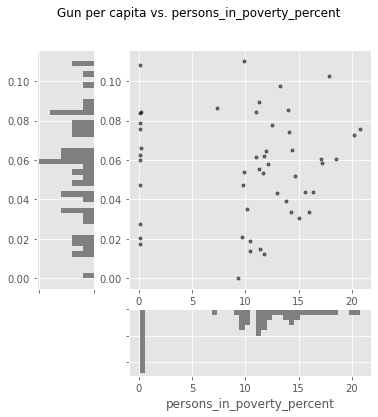

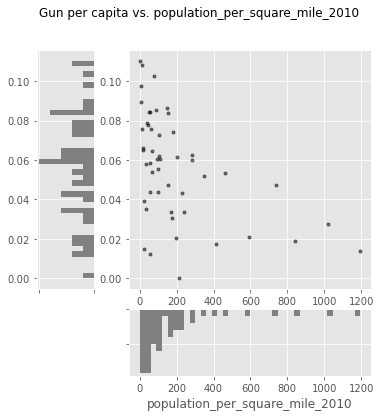

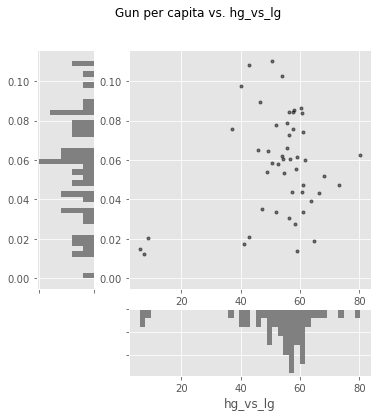

In [77]:
# Make combined scatter plots + histograms for gun per capita (x) vs. independent variables (y):
# Combined plots illustrate distribution (esp. outlier states) and correlation simultaneously 

q1_iv_list = ['veterans_2011_2015',
                'housing_units_july_1_2016',
                'households_2011_2015',
                'in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015',
                'median_household_income_in_2015_dollars_2011_2015',
                'per_capita_income_in_past_12_months_in_2015_dollars_2011_2015',
                'persons_in_poverty_percent',
                'population_per_square_mile_2010',
                'hg_vs_lg']

for i in q1_iv_list:
# Set up the axes with gridspec
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.3, wspace=0.6)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
    fig.suptitle('Gun per capita vs. %s' %i)
    
# Scatter plot on the main axes
    x = df_combi_2016_01[i]
    y = df_combi_2016_01.gun_per_capita
    main_ax.plot(x, y, 'ok', markersize=3, alpha=0.5)
    plt.xlabel('%s'.replace('_', ' ') %i)
        
# Histograms on the attached axes
    x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
    x_hist.invert_yaxis()
        
    y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
    y_hist.invert_xaxis()
    


>None of the independent variables are (visibly) normally distributed (except, maybe median household income; check histograms on x axes above). It is, therefore, impossible to draw any conclusions about a possible linear correlation between any of them and gun per capita, which, in turn, seems to be normally distributed. The scatterplots do not suggest any such correlation. 
>
>The issue of covariance among the independent variables is not discussed in this report.
>
>Two of the independent variables contain peculiar outliers (zeros): percentage of population in civilian labor force and percentage of persons in poverty, therefore we are excluding them from the analysis.
>
>The influence of the rest of the variables can be investigated with Spearman's correlation. This method uses ranked data: the ranks of the original data are correlated and the correlation coefficient is presented. 

In [78]:
# Move 'gun_per_capita' column to front for easier reading of correlation matrix:
gpc = df_combi_2016_01.gun_per_capita
df_combi_2016_01.drop(labels=['gun_per_capita'], axis=1,inplace = True)
df_combi_2016_01.insert(0, 'gun_per_capita', gpc)
df_combi_2016_01.head()

,gun_per_capita,hg_vs_lg,veterans_2011_2015,housing_units_july_1_2016,households_2011_2015,in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015,median_household_income_in_2015_dollars_2011_2015,per_capita_income_in_past_12_months_in_2015_dollars_2011_2015,persons_in_poverty_percent,population_per_square_mile_2010
state,,,,,,,,,,
Alabama,0.060510,54.433063,363170.0,2230185.0,1848325.0,58.0,43623.0,24091.0,17.1,94.4
Alaska,0.110392,50.607794,69323.0,310658.0,250969.0,67.7,72515.0,33413.0,9.9,1.2
Arizona,0.043963,60.629869,505794.0,2961003.0,2412212.0,59.3,50255.0,25848.0,16.4,56.3
Arkansas,0.058303,50.477495,220953.0,1354762.0,1138025.0,58.5,41371.0,22798.0,17.2,56.0
California,0.033799,51.928697,1777410.0,14060525.0,12717801.0,63.1,61818.0,30318.0,14.3,239.1


#### Correlation matrix (Spearman's rho: based on ranked scores):

In [79]:
df_combi_2016_01.corr(method='spearman')

,gun_per_capita,hg_vs_lg,veterans_2011_2015,housing_units_july_1_2016,households_2011_2015,in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015,median_household_income_in_2015_dollars_2011_2015,per_capita_income_in_past_12_months_in_2015_dollars_2011_2015,persons_in_poverty_percent,population_per_square_mile_2010
gun_per_capita,1.000000,-0.048367,-0.351549,-0.404850,-0.409556,-0.138751,-0.325138,-0.248980,0.016761,-0.534130
hg_vs_lg,-0.048367,1.000000,0.450714,0.460306,0.461020,-0.151762,0.006531,0.037347,0.059805,0.523534
veterans_2011_2015,-0.351549,0.450714,1.000000,0.986170,0.983770,-0.192926,-0.037407,0.009460,0.118673,0.540229
housing_units_july_1_2016,-0.404850,0.460306,0.986170,1.000000,0.998944,-0.163197,-0.005138,0.047395,0.119153,0.590314
households_2011_2015,-0.409556,0.461020,0.983770,0.998944,1.000000,-0.156665,0.002449,0.055750,0.113294,0.600062
in_civilian_labor_force_total_percent_of_population_age_16_years_2011_2015,-0.138751,-0.151762,-0.192926,-0.163197,-0.156665,1.000000,0.636121,0.533967,0.181281,-0.101196
median_household_income_in_2015_dollars_2011_2015,-0.325138,0.006531,-0.037407,-0.005138,0.002449,0.636121,1.000000,0.908956,-0.409039,0.276789
per_capita_income_in_past_12_months_in_2015_dollars_2011_2015,-0.248980,0.037347,0.009460,0.047395,0.055750,0.533967,0.908956,1.000000,-0.459370,0.361065
persons_in_poverty_percent,0.016761,0.059805,0.118673,0.119153,0.113294,0.181281,-0.409039,-0.459370,1.000000,-0.111375
population_per_square_mile_2010,-0.534130,0.523534,0.540229,0.590314,0.600062,-0.101196,0.276789,0.361065,-0.111375,1.000000


#### Interpretation of Spearman's correlation matrix (without statistical significance testing):
>
>Housing units, households and population per square mile seem to be moderately negatively correlated to gun per capita in a nonlinear manner: in states with higher population density, more housing units and more households, there seem to be less guns owned per capita (Spearman's rho: -.40, -.41, and -.53, resp.). We are not going to establish whether the correlation is statistically significant here.
>
>The amount of handguns relative to handguns plus longguns together seems unrelated to gun per capita. However, the correlation matrix suggests that it could be moderately positively correlated to the population density (rho = .52), housing units and households (both appr. .46), as well as the number of veterans (.45).
>
> A sorted table of gun per capita and the possibly correlated independent variables is presented below:

In [80]:
df_gun_per_cap_sorted01 = df_combi_2016_sort[['state', 'gun_per_capita', 
                                            'population_per_square_mile_2010', 
                                            'households_2011_2015',
                                            'hg_vs_lg']]
df_gun_per_cap_sorted01

,state,gun_per_capita,population_per_square_mile_2010,households_2011_2015,hg_vs_lg
1,Alaska,0.110392,1.2,250969.0,50.607794
40,South Dakota,0.108087,10.7,330858.0,42.970513
47,West Virginia,0.102363,77.1,740890.0,53.872672
25,Montana,0.097724,6.8,409394.0,40.139863
49,Wyoming,0.089549,5.8,226865.0,46.627558
28,New Hampshire,0.086550,147.0,520251.0,60.492841
24,Missouri,0.085405,87.1,2364688.0,57.895519
35,Oklahoma,0.084391,54.7,1455321.0,56.365534
5,Colorado,0.084288,48.5,2024468.0,57.505908
41,Tennessee,0.083673,153.9,2504556.0,60.717146


> Research question 2:
>
### Which states have had the highest growth in gun purchasing on a monthly basis from 1999 to 2016?
>
>
> For aggregations, a separate 'year' column is necessary:

In [81]:
# Make a 'year' column:
df_gun_trimmed01['year'] = df_gun_trimmed01.month.str.split('-').str[0]
df_gun_trimmed01.head()

,month,state,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02,date,monthly_growth,year
12320,1999-01,Alabama,7516.0,10311.0,0.0,444.0,NaN,42.160767,17827.0,1999-01-01,NaN,1999
12265,1999-02,Alabama,9630.0,10654.0,0.0,598.0,NaN,47.475843,20284.0,1999-02-01,1.137825,1999
12210,1999-03,Alabama,9151.0,9991.0,0.0,564.0,NaN,47.805872,19142.0,1999-03-01,0.943699,1999
12155,1999-04,Alabama,7371.0,7218.0,0.0,468.0,NaN,50.524368,14589.0,1999-04-01,0.762146,1999
12100,1999-05,Alabama,7005.0,6832.0,0.0,412.0,NaN,50.625136,13837.0,1999-05-01,0.948454,1999


> Compute mean growth rate per year per state:

In [82]:
df_gun_mean_per_year = df_gun_trimmed01.groupby(['state', 'year']).mean()
df_gun_mean_per_year

handgun      long_gun       other    multiple      total01  \
state   year                                                                   
Alabama 1999  7878.666667  12418.083333    0.000000  532.500000          NaN   
        2000  6831.916667  11397.250000    0.000000  524.833333          NaN   
        2001  6990.416667  11242.833333    0.000000  581.666667          NaN   
        2002  5441.166667   9278.250000    0.000000  591.333333          NaN   
        2003  5665.416667   9508.666667    0.000000  603.333333          NaN   
...                   ...           ...         ...         ...          ...   
Wyoming 2012  2002.416667   2355.250000   48.333333  233.333333  4639.333333   
        2013  2224.333333   2481.166667   75.250000  234.166667  5014.916667   
        2014  1804.583333   2264.083333   73.250000  208.166667  4350.083333   
        2015  1864.500000   2188.666667   93.583333  213.166667  4359.916667   
        2016  1880.750000   2151.250000  121.416667  215.833333  4369.250000   

               hg_vs_lg       total02  monthly_growth  
state   year                                           
Alabama 1999  41.443366  20296.750000        1.091892  
        2000  40.194252  18229.166667        1.024846  
        2001  40.707205  18233.250000        1.022469  
        2002  40.274462  14719.416667        1.037741  
        2003  40.564559  15174.083333        1.042434  
...                 ...           ...             ...  
Wyoming 2012  46.001583   4357.666667        1.077180  
        2013  46.479246   4705.500000        0.980005  
        2014  44.355684   4068.666667        1.028049  
        2015  45.532025   4053.166667        1.054188  
        2016  46.627558   4032.000000        0.991827  

[900 rows x 8 columns]

> For 2 states, the monthly growth rate is null and they are excluded (thus, 48 states remain). 

In [83]:
# Are there nulls in aggregated values?
df_gun_mean_per_year.isna().sum()

handgun             0
long_gun            0
other               0
multiple            0
total01           500
hg_vs_lg           16
total02             0
monthly_growth     20
dtype: int64

In [84]:
# Show the nulls
df_gun_mean_per_year[df_gun_mean_per_year['monthly_growth'].isnull()]

handgun     long_gun     other   multiple   total01  \
state       year                                                           
Connecticut 2000    0.666667     0.333333  0.000000   0.000000       NaN   
            2001  784.500000  1096.083333  0.000000  79.000000       NaN   
Hawaii      1999    0.000000     0.333333  0.000000   0.000000       NaN   
            2000    0.000000     0.000000  0.000000   0.000000       NaN   
            2001    0.000000     0.000000  0.000000   0.000000       NaN   
            2002    0.000000     0.000000  0.000000   0.000000       NaN   
            2003    0.000000     0.000000  0.000000   0.000000       NaN   
            2004    0.000000     0.000000  0.000000   0.000000       NaN   
            2005    0.000000     0.000000  0.000000   0.000000       NaN   
            2006    0.000000     0.000000  0.000000   0.000000       NaN   
            2007    0.000000     0.000000  0.000000   0.000000       NaN   
            2008    0.000000     0.000000  0.000000   0.000000       NaN   
            2009    0.000000     0.000000  0.000000   0.000000  0.000000   
            2010    0.000000     0.000000  0.000000   0.000000  0.000000   
            2011    0.000000     0.000000  0.000000   0.000000  0.000000   
            2012    0.166667     0.166667  0.166667   0.333333  0.833333   
            2013    0.000000     0.000000  0.000000   0.000000  0.000000   
            2014    0.000000     0.000000  0.000000   0.000000  0.000000   
            2015    0.000000     0.000000  0.000000   0.000000  0.000000   
            2016    0.000000     0.000000  0.000000   0.000000  0.000000   

                   hg_vs_lg      total02  monthly_growth  
state       year                                          
Connecticut 2000  66.666667     1.000000             NaN  
            2001  62.902545  1880.583333             NaN  
Hawaii      1999   0.000000     0.333333             NaN  
            2000        NaN     0.000000             NaN  
            2001        NaN     0.000000             NaN  
            2002        NaN     0.000000             NaN  
            2003        NaN     0.000000             NaN  
            2004        NaN     0.000000             NaN  
            2005        NaN     0.000000             NaN  
            2006        NaN     0.000000             NaN  
            2007        NaN     0.000000             NaN  
            2008        NaN     0.000000             NaN  
            2009        NaN     0.000000             NaN  
            2010        NaN     0.000000             NaN  
            2011        NaN     0.000000             NaN  
            2012  50.000000     0.333333             NaN  
            2013        NaN     0.000000             NaN  
            2014        NaN     0.000000             NaN  
            2015        NaN     0.000000             NaN  
            2016        NaN     0.000000             NaN

In [85]:
# >Exclude Connecticut and Hawaii 
df_gun_mean_per_year.drop(df_gun_mean_per_year[df_gun_mean_per_year.monthly_growth.isna()].index, inplace=True)

In [86]:
# Now there are no nulls in aggregated monthly growth:
df_gun_mean_per_year.isna().sum()

handgun             0
long_gun            0
other               0
multiple            0
total01           488
hg_vs_lg            0
total02             0
monthly_growth      0
dtype: int64

> The mean growth in gun purchasing per year per state is illustrated on a multiple line chart below.
>
> First, reset index of mean growth per year to use in plot:

In [87]:
# First reset index
df_gun_mean_per_year01 = df_gun_mean_per_year.reset_index()
df_gun_mean_per_year01 

,state,year,handgun,long_gun,other,multiple,total01,hg_vs_lg,total02,monthly_growth
0,Alabama,1999,7878.666667,12418.083333,0.000000,532.500000,NaN,41.443366,20296.750000,1.091892
1,Alabama,2000,6831.916667,11397.250000,0.000000,524.833333,NaN,40.194252,18229.166667,1.024846
2,Alabama,2001,6990.416667,11242.833333,0.000000,581.666667,NaN,40.707205,18233.250000,1.022469
3,Alabama,2002,5441.166667,9278.250000,0.000000,591.333333,NaN,40.274462,14719.416667,1.037741
4,Alabama,2003,5665.416667,9508.666667,0.000000,603.333333,NaN,40.564559,15174.083333,1.042434
...,...,...,...,...,...,...,...,...,...,...
875,Wyoming,2012,2002.416667,2355.250000,48.333333,233.333333,4639.333333,46.001583,4357.666667,1.077180
876,Wyoming,2013,2224.333333,2481.166667,75.250000,234.166667,5014.916667,46.479246,4705.500000,0.980005
877,Wyoming,2014,1804.583333,2264.083333,73.250000,208.166667,4350.083333,44.355684,4068.666667,1.028049
878,Wyoming,2015,1864.500000,2188.666667,93.583333,213.166667,4359.916667,45.532025,4053.166667,1.054188


In [88]:
# Remove all columns except 'monthly growth' (extract series):
df_gun_mean_per_year02 = df_gun_mean_per_year['monthly_growth']
df_gun_mean_per_year02.head()

state    year
Alabama  1999    1.091892
         2000    1.024846
         2001    1.022469
         2002    1.037741
         2003    1.042434
Name: monthly_growth, dtype: float64

In [89]:
# Unstack multiindex('state', 'year') to use dataframe for bar chart:
# Unstacking transposes the dataframe:
df_gun_mean_per_year03 = df_gun_mean_per_year02.unstack(level=0)
df_gun_mean_per_year03.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1999,1.091892,1.096227,1.070995,1.086709,1.100974,1.124585,1.035709,1.107863,1.085003,1.161390,...,1.130293,1.092884,1.083044,1.102704,1.113322,1.078789,1.088424,1.079004,1.116320,1.075314
2000,1.024846,1.036272,0.999230,1.017278,1.014464,1.013591,NaN,1.018882,1.012150,1.028734,...,1.047680,1.017635,1.016216,1.049896,1.018691,1.014301,1.009807,1.020871,1.030981,1.028794
2001,1.022469,1.018551,1.018989,1.024351,0.994533,1.029875,NaN,1.048188,1.022446,1.038828,...,1.056876,1.035418,1.025654,1.038396,1.061768,1.032173,1.025491,1.028488,1.058274,1.022310
2002,1.037741,1.043752,0.998588,1.035940,1.013985,0.981705,1.005572,1.018460,1.015204,1.033196,...,1.045217,1.030045,1.030370,1.034404,1.022803,1.018767,1.021867,1.025761,1.035643,1.014291
2003,1.042434,1.015729,1.032793,1.044286,0.991257,1.018939,1.023226,1.025135,1.022012,1.045921,...,1.042633,1.028490,1.043828,1.046017,1.037649,1.030980,1.023355,1.028951,1.049277,1.046051


In [90]:
# 18 years x 49 states:
df_gun_mean_per_year03.shape

(18, 49)

In [91]:
# Set index ('year') to column for line plot:
# Reset index to normal column ('state'), in order to use in graphs:
df_gun_mean_per_year04 = df_gun_mean_per_year03.reset_index(level=0)
df_gun_mean_per_year04.head()

state,year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1999,1.091892,1.096227,1.070995,1.086709,1.100974,1.124585,1.035709,1.107863,1.085003,...,1.130293,1.092884,1.083044,1.102704,1.113322,1.078789,1.088424,1.079004,1.116320,1.075314
1,2000,1.024846,1.036272,0.999230,1.017278,1.014464,1.013591,NaN,1.018882,1.012150,...,1.047680,1.017635,1.016216,1.049896,1.018691,1.014301,1.009807,1.020871,1.030981,1.028794
2,2001,1.022469,1.018551,1.018989,1.024351,0.994533,1.029875,NaN,1.048188,1.022446,...,1.056876,1.035418,1.025654,1.038396,1.061768,1.032173,1.025491,1.028488,1.058274,1.022310
3,2002,1.037741,1.043752,0.998588,1.035940,1.013985,0.981705,1.005572,1.018460,1.015204,...,1.045217,1.030045,1.030370,1.034404,1.022803,1.018767,1.021867,1.025761,1.035643,1.014291
4,2003,1.042434,1.015729,1.032793,1.044286,0.991257,1.018939,1.023226,1.025135,1.022012,...,1.042633,1.028490,1.043828,1.046017,1.037649,1.030980,1.023355,1.028951,1.049277,1.046051


>Connecticut and Hawaii are excluded (due to missing data), therefore the comparison is among 48 states.
>The growth curves of the states are represented in a line chart:

Text(0.5, 1.0, 'Growth of gun purchasing calculated on monthly basis')

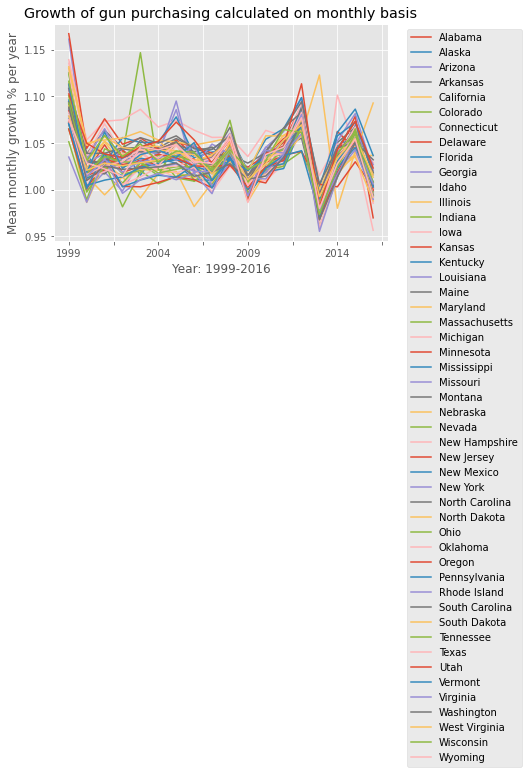

In [92]:
# Make a line graph:
# each state = line
# each year = point
df_gun_mean_per_year04.plot(x="year", y=df_gun_mean_per_year03.columns)
plt.xlabel('Year: 1999-2016')
plt.ylabel('Mean monthly growth % per year')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Growth of gun purchasing calculated on monthly basis')

>The mean growth of the entire period across 48 states states is shown in a bar chart (below):

In [93]:
df_mean_growth_0016 = df_gun_mean_per_year04.mean()
df_mean_growth_0016.head()

state
year        1.110667e+70
Alabama     1.038884e+00
Alaska      1.038064e+00
Arizona     1.025059e+00
Arkansas    1.039054e+00
dtype: float64

In [94]:
# Drop first row ('year')
mean_growth_0016_01 = df_mean_growth_0016.iloc[1:]
mean_growth_0016_01.head()                                               

state
Alabama       1.038884
Alaska        1.038064
Arizona       1.025059
Arkansas      1.039054
California    1.022234
dtype: float64

>Sorted values of mean monthly growth per state for the period 1999-2016:

In [95]:
# Sort:
mean_growth_0016_01.sort_values(ascending=False, inplace=True)
mean_growth_0016_01

state
Iowa              1.062025
Mississippi       1.052871
Nebraska          1.050866
Georgia           1.050096
North Carolina    1.049478
Minnesota         1.046812
Utah              1.046742
South Carolina    1.044034
Louisiana         1.043570
South Dakota      1.040754
Maine             1.040213
Arkansas          1.039054
Alabama           1.038884
Michigan          1.038819
Wisconsin         1.038628
Alaska            1.038064
Maryland          1.036734
North Dakota      1.036733
Vermont           1.036374
Idaho             1.036121
Kentucky          1.035778
Montana           1.035502
Tennessee         1.035100
Texas             1.034979
Indiana           1.034398
West Virginia     1.034005
New York          1.032924
Wyoming           1.032881
Missouri          1.032249
Delaware          1.032198
Oklahoma          1.031647
Kansas            1.030650
Ohio              1.029984
Oregon            1.028788
Virginia          1.028696
Illinois          1.028067
Massachusetts     1.02

Text(0.5, 1.0, 'Growth of gun purchasing on monthly basis: Mean growth 1999-2016')

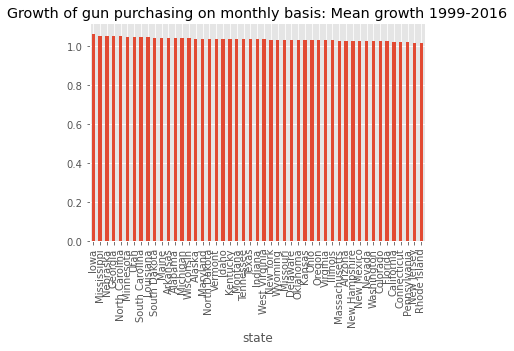

In [96]:
# Mean growth throughout the period 2000 - 2016: bar chart of states
mean_growth_0016_01.plot.bar()
plt.title('Growth of gun purchasing on monthly basis: Mean growth 1999-2016')

>Research question 3:
>
### What is the overall trend of gun purchases?
>
>Aggregate for Q3: mean monthly growth of 48 states for each year.

In [97]:
# Compute mean for Q3:
monthly_gr_per_year = df_gun_mean_per_year01.groupby('year')['monthly_growth'].mean() 
monthly_gr_per_year

year
1999    1.094546
2000    1.020327
2001    1.036367
2002    1.027285
2003    1.036915
2004    1.033747
2005    1.039695
2006    1.028644
2007    1.023623
2008    1.042422
2009    1.008006
2010    1.030873
2011    1.043150
2012    1.074187
2013    0.984893
2014    1.031924
2015    1.056523
2016    1.004464
Name: monthly_growth, dtype: float64

>Growth curve for mean of 48 states over the period 1999-2016 is depicted on a line plot:

Text(0.5, 1.0, 'Mean growth of gun purchasing per year based on 48 states')

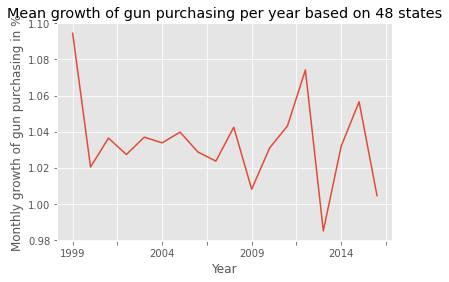

In [98]:
# Line plot of monthly growth per year (mean of 48 states):
ax = plt.gca()
monthly_gr_per_year.plot(kind='line',x='year',y='monthly_growth',ax=ax)
plt.xlabel('Year')
plt.ylabel('Monthly growth of gun purchasing in %')
plt.title('Mean growth of gun purchasing per year based on 48 states')

>The mean growth in gun purchasing of 48 states amounts to 1.03% for the period 1999-2016:

In [99]:
monthly_gr_per_year.mean()

1.034310692506766

<a id='conclusions'></a>
## Conclusions

#### Q1: What census data is most associated with high gun per capita?
>
>The dependent variable of interest for Q1 is gun per capita, computed from the sum of purchases of handguns, long guns and "other" guns, plus the "multiple" transaction multiplied by 2 (resulting in minimum number of guns purchased in "multiple" transactions).
>

>We explored the influence of several demographic variables on gun per capita:
>

>1) Number of veterans
>
>2) Number of housing units
>
>3) Number of households
>
>4) Percentage of population in civilian labor force 
>
>5) Median household income
>
>6) Income per capita
>
>7) Percentage of persons in poverty
>
>8) Population per square mile  
>

>Only three of those seem to be correlated (on the basis of ranked scores due to apparent nonnormality) to gun per capita: housing units, households and population per square mile. The direction of the correlation appears to be negatove: less populated states with less housing units and less households seem to have higher amount of firearms per capita.  
>
> The bar chart of gun per capita vs. state shows that there is a considerable variation in this variable across 50 states.
>

>The first 5 states by gun per capita are the following:

>
>Alaska	(0.110392)
>
>South Dakota (0.108087)
>
>West Virginia 	(0.102363)
>
>Montana (0.097724)
>
>Wyoming (0.089549)
>

>Some of these states are also among the least populated:
>

>Alaska (pop per sq.mile: 1.2, households: 250969.0) 
>
>South Dakota (10.7; 330858.0)
>
>West Virginia (77.1; 740890.0)
>
>Montana (6.8; 409394.0)
>
>Wyoming (5.8; 226865.0)
>

>An outlier in this respect is West Virginia, which is much more densely populated than the other 4 states in top 5. This difference is possibly related to cultural or other factors. In less populated states, high gun per capita is possibly related to rural population, hunting, etc. The latter corresponds to the moderately positive Spearman's correlation between  'handgun vs. longgun ratio' and high population density and high number of households and housing units, as well as the higher number of veterans. 
>
>It could be further speculated that the overall amount of firearms per capita is more inlfuenced by low population density, rural population and hunting than by gun purchasing behavior in highly populated and possibly crime-ridden areas.
>
>
>
#### Q2: Which states have had the highest growth in gun purchasing on a monthly basis from 1999 to 2016?
>
>The first 5 states with highest mean growth (from month to month) are the following (rounded to second decimal place):
>

>Iowa: 1.06%
>
>Mississippi: 1.05%
>
>Nebraska: 1.05%
>
>Georgia: 1.05%
>
>North Carolina: 1.05%
>

>The differences among all 49 states are minimal, as can be seen on the bar plot.
>
>
>
#### Q3: What is the overall trend of gun purchases?
>
>The mean growth in gun purchasing of 48 states amounts to approximately 1.03% for the period 1999-2016.
>Throughout this period, the mean growth on a monthly basis fluctuated between 0.98% (year: 2013) to 1.09% (1999). The trend has been relatively flat between 2000 and 2007 with larger fluctuations since 2009.
>
>
>
## Limitations
>
>The main limitation of this report is the granularity of the state as unit of analysis: 
>
>1) States vary a lot in terms of geographical size and population;
>
>2) A state (especially a large and heavily populated one) can contain vastly different communities with different cultural backgrounds, socio-economic status and crime levels;
>
>3) Correlation and regression are more efficient with more data points: a scatter plot of only 50 states is less informative than a scatter plot of, e.g. hundreds of smaller communities.